# Import

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Get and clean the Dataset

In [307]:
# extract the raw dataset
data = pd.read_csv('Biotech_dataset.csv')
data

,Time,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,1/4/2024 15:00,821 W,207 W,467 W,147 W
1,1/4/2024 16:00,741 W,298 W,329 W,114 W
2,1/4/2024 17:00,776 W,363 W,278 W,135 W
3,1/4/2024 18:00,"1,260 W",659 W,419 W,182 W
4,1/4/2024 19:00,973 W,381 W,410 W,182 W
...,...,...,...,...,...
4809,7/8/2024 5:00,"1,040 W",635 W,259 W,146 W
4810,7/8/2024 6:00,"1,414 W","1,023 W",251 W,140 W
4811,7/8/2024 7:00,571 W,225 W,243 W,103 W
4812,7/8/2024 8:00,784 W,411 W,280 W,93 W


In [308]:
# extract pure numbers - no commas and units
for col in data.columns:
  if col == "Time":
    continue
  data[col] = data[col].astype(str)
  data[col] = data[col].str.split().str[0]
  data[col] = data[col].str.replace(',', '')
  data[col] = pd.to_numeric(data[col])

In [309]:
data

,Time,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,1/4/2024 15:00,821,207,467,147
1,1/4/2024 16:00,741,298,329,114
2,1/4/2024 17:00,776,363,278,135
3,1/4/2024 18:00,1260,659,419,182
4,1/4/2024 19:00,973,381,410,182
...,...,...,...,...,...
4809,7/8/2024 5:00,1040,635,259,146
4810,7/8/2024 6:00,1414,1023,251,140
4811,7/8/2024 7:00,571,225,243,103
4812,7/8/2024 8:00,784,411,280,93


# Remove Non-hourly data


In [310]:
# we need data on hourly basis.
# So, remove data in between hours
dropped_indices=[]
for idx, row in data.iterrows():
    minutes = row['Time'][-1] + row['Time'][-2]
    if minutes != '00':
        dropped_indices.append(idx)
data = data.drop(dropped_indices)
data

,Time,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,1/4/2024 15:00,821,207,467,147
1,1/4/2024 16:00,741,298,329,114
2,1/4/2024 17:00,776,363,278,135
3,1/4/2024 18:00,1260,659,419,182
4,1/4/2024 19:00,973,381,410,182
...,...,...,...,...,...
4809,7/8/2024 5:00,1040,635,259,146
4810,7/8/2024 6:00,1414,1023,251,140
4811,7/8/2024 7:00,571,225,243,103
4812,7/8/2024 8:00,784,411,280,93


In [311]:
len(dropped_indices)

483

# Extract Time of Day and Day of Week

In [312]:
# convert the date and time in string format to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# extract day of week from date and create a new column
data['Day'] = data['Time'].dt.day_name()

# Create a new column for time of day
data['TOD'] = data['Time'].dt.time

# Bring time od day column to the front
TOD = data.pop('TOD')
data.insert(1, 'TOD', TOD)

# Place Day column after the TOD column
day = data.pop('Day')
data.insert(2, 'Day', day)

data

,Time,TOD,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,2024-01-04 15:00:00,15:00:00,Thursday,821,207,467,147
1,2024-01-04 16:00:00,16:00:00,Thursday,741,298,329,114
2,2024-01-04 17:00:00,17:00:00,Thursday,776,363,278,135
3,2024-01-04 18:00:00,18:00:00,Thursday,1260,659,419,182
4,2024-01-04 19:00:00,19:00:00,Thursday,973,381,410,182
...,...,...,...,...,...,...,...
4809,2024-07-08 05:00:00,05:00:00,Monday,1040,635,259,146
4810,2024-07-08 06:00:00,06:00:00,Monday,1414,1023,251,140
4811,2024-07-08 07:00:00,07:00:00,Monday,571,225,243,103
4812,2024-07-08 08:00:00,08:00:00,Monday,784,411,280,93


# Remove Duplicates

In [313]:
# If two rows have equal times, they are duplicates
# Find duplicates first
mask = data.duplicated(subset=['Time', 'TOD', 'Day'])
data[mask]

,Time,TOD,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
1466,2024-03-06 00:00:00,00:00:00,Wednesday,1091,373,256,462
1478,2024-03-06 01:00:00,01:00:00,Wednesday,1097,375,262,460
1490,2024-03-06 02:00:00,02:00:00,Wednesday,1103,374,256,473
1502,2024-03-06 03:00:00,03:00:00,Wednesday,1105,378,261,466
1514,2024-03-06 04:00:00,04:00:00,Wednesday,1156,375,309,472
...,...,...,...,...,...,...,...
4109,2024-06-06 07:00:00,07:00:00,Thursday,791,416,267,108
4110,2024-06-06 08:00:00,08:00:00,Thursday,1521,1020,393,108
4111,2024-06-06 09:00:00,09:00:00,Thursday,1999,1547,346,106
4112,2024-06-06 10:00:00,10:00:00,Thursday,4036,3322,469,245


In [314]:
# Drop duplicate rows keeping the first one
data.drop_duplicates(subset=['Time', 'TOD', 'Day'], keep='first', inplace=True)
data

,Time,TOD,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,2024-01-04 15:00:00,15:00:00,Thursday,821,207,467,147
1,2024-01-04 16:00:00,16:00:00,Thursday,741,298,329,114
2,2024-01-04 17:00:00,17:00:00,Thursday,776,363,278,135
3,2024-01-04 18:00:00,18:00:00,Thursday,1260,659,419,182
4,2024-01-04 19:00:00,19:00:00,Thursday,973,381,410,182
...,...,...,...,...,...,...,...
4809,2024-07-08 05:00:00,05:00:00,Monday,1040,635,259,146
4810,2024-07-08 06:00:00,06:00:00,Monday,1414,1023,251,140
4811,2024-07-08 07:00:00,07:00:00,Monday,571,225,243,103
4812,2024-07-08 08:00:00,08:00:00,Monday,784,411,280,93


# Find the Missing Hours

In [315]:
start_date = data['Time'].iloc[0]   #First datetime in the dataset
end_date = data['Time'].iloc[-1]    #last datetime in the dataset

# Create a DatetimeIndex with hourly frequency
date_range = pd.date_range(start_date, end_date, freq='H')

# Find missing dates by comparing the DatetimeIndex with the dataframe's 'datetime' column
missing_hours = date_range.difference(data['Time'])

# Create a new dataframe with the missing hours
dummy_dict = {'Time':[], 'TOD':[], 'Day':[], 'Total (W)':[], 'Phase_A (W)':[], 'Phase_B (W)':[], 'Phase_C (W)':[]}
df_missing = pd.DataFrame(dummy_dict)
df_missing['Time'] = missing_hours
df_missing['TOD'] = df_missing['Time'].dt.time
df_missing['Day'] = df_missing['Time'].dt.day_name()

# Print the dataframe of missing hours
df_missing

,Time,TOD,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,2024-01-27 12:00:00,12:00:00,Saturday,NaN,NaN,NaN,NaN
1,2024-01-27 13:00:00,13:00:00,Saturday,NaN,NaN,NaN,NaN
2,2024-01-27 14:00:00,14:00:00,Saturday,NaN,NaN,NaN,NaN
3,2024-01-27 15:00:00,15:00:00,Saturday,NaN,NaN,NaN,NaN
4,2024-01-30 19:00:00,19:00:00,Tuesday,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
198,2024-07-07 03:00:00,03:00:00,Sunday,NaN,NaN,NaN,NaN
199,2024-07-07 04:00:00,04:00:00,Sunday,NaN,NaN,NaN,NaN
200,2024-07-07 05:00:00,05:00:00,Sunday,NaN,NaN,NaN,NaN
201,2024-07-07 06:00:00,06:00:00,Sunday,NaN,NaN,NaN,NaN


# Fill in the powers at missing hours by their weekly average values
e.g. if data at '2024-01-27 12:00:00'(Saturday) is missing, average of powers at 12 PM of all Saturdays will be used to fill up this missing value.

In [316]:
for i in range(len(df_missing['Time'])):
  day = df_missing['Day'][i]
  hour = df_missing['Time'].dt.hour[i]
  temp_df = data[(data['Day']==day) & (data['Time'].dt.hour==hour)]
  df_missing['Total (W)'][i] = int(temp_df['Total (W)'].mean())
  df_missing['Phase_A (W)'][i] = int(temp_df['Phase_A (W)'].mean())
  df_missing['Phase_B (W)'][i] = int(temp_df['Phase_B (W)'].mean())
  df_missing['Phase_C (W)'][i] = int(temp_df['Phase_C (W)'].mean())

<ipython-input-316-8018944f8954>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Total (W)'][i] = int(temp_df['Total (W)'].mean())
<ipython-input-316-8018944f8954>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Phase_A (W)'][i] = int(temp_df['Phase_A (W)'].mean())
<ipython-input-316-8018944f8954>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Phase_B (W)'][i] = int(temp_df['Phase_B (W)'].mean())

In [317]:
df_missing

,Time,TOD,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,2024-01-27 12:00:00,12:00:00,Saturday,902.0,490.0,306.0,105.0
1,2024-01-27 13:00:00,13:00:00,Saturday,804.0,407.0,291.0,105.0
2,2024-01-27 14:00:00,14:00:00,Saturday,802.0,416.0,280.0,105.0
3,2024-01-27 15:00:00,15:00:00,Saturday,894.0,477.0,310.0,106.0
4,2024-01-30 19:00:00,19:00:00,Tuesday,1008.0,480.0,326.0,201.0
...,...,...,...,...,...,...,...
198,2024-07-07 03:00:00,03:00:00,Sunday,855.0,394.0,276.0,184.0
199,2024-07-07 04:00:00,04:00:00,Sunday,912.0,436.0,291.0,184.0
200,2024-07-07 05:00:00,05:00:00,Sunday,998.0,517.0,296.0,184.0
201,2024-07-07 06:00:00,06:00:00,Sunday,900.0,431.0,311.0,157.0


In [318]:
# now insert the estimates of missing values in their
# corresponding locations in the original dataframe
for i in range (len(df_missing)):
  prev_time = df_missing['Time'][i]-pd.Timedelta(hours=1)
  prev_index = data[data['Time']==prev_time].index[0]
  row_to_append = df_missing[df_missing['Time']==df_missing['Time'][i]]
  data = pd.concat([data[:prev_index + 1], row_to_append, data[prev_index + 1:]], ignore_index=True)

In [319]:
# Create a new column for hours and insert it after the TOD column
data['Hour'] = data['Time'].dt.hour
Hour = data.pop('Hour')
data.insert(2, 'Hour', Hour)
data

,Time,TOD,Hour,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W)
0,2024-01-04 15:00:00,15:00:00,15,Thursday,821.0,207.0,467.0,147.0
1,2024-01-04 16:00:00,16:00:00,16,Thursday,741.0,298.0,329.0,114.0
2,2024-01-04 17:00:00,17:00:00,17,Thursday,776.0,363.0,278.0,135.0
3,2024-01-04 18:00:00,18:00:00,18,Thursday,1260.0,659.0,419.0,182.0
4,2024-01-04 19:00:00,19:00:00,19,Thursday,973.0,381.0,410.0,182.0
...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,5,Monday,1040.0,635.0,259.0,146.0
4455,2024-07-08 06:00:00,06:00:00,6,Monday,1414.0,1023.0,251.0,140.0
4456,2024-07-08 07:00:00,07:00:00,7,Monday,571.0,225.0,243.0,103.0
4457,2024-07-08 08:00:00,08:00:00,8,Monday,784.0,411.0,280.0,93.0


In [320]:
data.isna().sum()

Time           0
TOD            0
Hour           0
Day            0
Total (W)      0
Phase_A (W)    0
Phase_B (W)    0
Phase_C (W)    0
dtype: int64

# One Hot Encoding of Day of Week

In [323]:
# one hot encode the day column
day_dummies = pd.DataFrame(pd.get_dummies(data['Day']))
data = pd.concat([data, day_dummies], axis=1)
data

,Time,TOD,Hour,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2024-01-04 15:00:00,15:00:00,15,Thursday,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False
1,2024-01-04 16:00:00,16:00:00,16,Thursday,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False
2,2024-01-04 17:00:00,17:00:00,17,Thursday,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False
3,2024-01-04 18:00:00,18:00:00,18,Thursday,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False
4,2024-01-04 19:00:00,19:00:00,19,Thursday,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,5,Monday,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False
4455,2024-07-08 06:00:00,06:00:00,6,Monday,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False
4456,2024-07-08 07:00:00,07:00:00,7,Monday,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False
4457,2024-07-08 08:00:00,08:00:00,8,Monday,784.0,411.0,280.0,93.0,False,True,False,False,False,False,False


In [324]:
# drop the original day column
# data.drop('Day', axis=1, inplace=True)
# data

# Add Public Holiday information

In [325]:
# create a new column for public holidays initialize with False bool values
data['Holiday'] = False

# createa dataframe of all public holidays
public_holidays = {'Date': ['2024-01-12', '2024-01-15', '2024-02-13', '2024-02-14', '2024-02-19',
                     '2024-03-08', '2024-03-11', '2024-04-11', '2024-04-13', '2024-04-17',
                     '2024-05-01', '2024-05-23', '2024-05-28' ]}
public_holidays = pd.DataFrame(public_holidays)
public_holidays['Date'] = pd.to_datetime(public_holidays['Date'])

In [326]:
# find the indices of all public holidays in the original dataframe
public_holiday_indices = []
for i in range(len(public_holidays['Date'])):
  holiday = public_holidays['Date'][i].date()
  holiday_indices = holiday == data['Time'].dt.date
  holiday_indices = holiday_indices.to_list()
  holiday_indices = [i for i, x in enumerate(holiday_indices) if x]
  public_holiday_indices.extend(holiday_indices)

In [327]:
# set bool values to True at public_holiday_indices
for idx in public_holiday_indices:
  data['Holiday'][idx] = True

<ipython-input-327-262f1d665500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'][idx] = True
<ipython-input-327-262f1d665500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'][idx] = True
<ipython-input-327-262f1d665500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'][idx] = True
<ipython-input-327-262f1d665500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [328]:
# There are 13 public holidays in the given datetime range
# so, the length of data['Holiday'] == True, should be
# 13*24 = 312
data['Holiday'].sum()

312

In [329]:
# Additionally, all saturdays are public holidays
for i in range(len(data['Holiday'])):
  if data['Saturday'][i]:
    data['Holiday'][i] = True

<ipython-input-329-3b274ee5e356>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'][i] = True
<ipython-input-329-3b274ee5e356>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'][i] = True
<ipython-input-329-3b274ee5e356>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holiday'][i] = True
<ipython-input-329-3b274ee5e356>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [330]:
# There are 26 saturdays in this dataframe
# so the total number of data['Holiday'] == True should be
# 26*24 + 312 = 936
data['Holiday'].sum()

936

# Detect and Replace Outliers

**Method 1 - IQR**

In [331]:
data['Outliers Total Upper'] = False
data['Outliers Phase_A Upper'] = False
data['Outliers Phase_B Upper'] = False
data['Outliers Phase_C Upper'] = False

data['Outliers Total Lower'] = False
data['Outliers Phase_A Lower'] = False
data['Outliers Phase_B Lower'] = False
data['Outliers Phase_C Lower'] = False
data

,Time,TOD,Hour,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,...,Wednesday,Holiday,Outliers Total Upper,Outliers Phase_A Upper,Outliers Phase_B Upper,Outliers Phase_C Upper,Outliers Total Lower,Outliers Phase_A Lower,Outliers Phase_B Lower,Outliers Phase_C Lower
0,2024-01-04 15:00:00,15:00:00,15,Thursday,821.0,207.0,467.0,147.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024-01-04 16:00:00,16:00:00,16,Thursday,741.0,298.0,329.0,114.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2024-01-04 17:00:00,17:00:00,17,Thursday,776.0,363.0,278.0,135.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2024-01-04 18:00:00,18:00:00,18,Thursday,1260.0,659.0,419.0,182.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2024-01-04 19:00:00,19:00:00,19,Thursday,973.0,381.0,410.0,182.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,5,Monday,1040.0,635.0,259.0,146.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4455,2024-07-08 06:00:00,06:00:00,6,Monday,1414.0,1023.0,251.0,140.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4456,2024-07-08 07:00:00,07:00:00,7,Monday,571.0,225.0,243.0,103.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4457,2024-07-08 08:00:00,08:00:00,8,Monday,784.0,411.0,280.0,93.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [332]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in days:
  data_week_day_df = data[data[day]==True].reset_index(drop=True)

  for i in range(24):
    temp_df = data_week_day_df[data_week_day_df['Hour']==i]
    total_q1, phase_a_q1, phase_b_q1, phase_c_q1 = temp_df['Total (W)'].quantile(0.25), temp_df['Phase_A (W)'].quantile(0.25), temp_df['Phase_B (W)'].quantile(0.25), temp_df['Phase_C (W)'].quantile(0.25)
    total_q3, phase_a_q3, phase_b_q3, phase_c_q3  = temp_df['Total (W)'].quantile(0.75), temp_df['Phase_A (W)'].quantile(0.75), temp_df['Phase_B (W)'].quantile(0.75), temp_df['Phase_C (W)'].quantile(0.75)
    total_iqr, phase_a_iqr, phase_b_iqr, phase_c_iqr = (total_q3 - total_q1), (phase_a_q3 - phase_a_q1), (phase_b_q3 - phase_b_q1), (phase_c_q3 - phase_c_q1)
    total_lower_bound, phase_a_lower_bound, phase_b_lower_bound, phase_c_lower_bound  = (total_q1 - 1.5 * total_iqr), (phase_a_q1 - 1.5 * phase_a_iqr), (phase_b_q1 - 1.5 * phase_b_iqr), (phase_c_q1 - 1.5 * phase_c_iqr)
    total_upper_bound, phase_a_upper_bound, phase_b_upper_bound, phase_c_upper_bound = (total_q3 + 1.5 * total_iqr), (phase_a_q3 + 1.5 * phase_a_iqr), (phase_b_q3 + 1.5 * phase_b_iqr), (phase_c_q3 + 1.5 * phase_c_iqr)

    condition_for_total_lower = (data['Day']==day) & (data['Hour']==i) & ((data['Total (W)'] < total_lower_bound))
    data.loc[condition_for_total_lower, 'Outliers Total Lower'] = True
    data.loc[condition_for_total_lower, 'Total (W)'] = total_lower_bound
    condition_for_total_upper = (data['Day']==day) & (data['Hour']==np.float64(i)) & ((data['Total (W)'] > total_upper_bound))
    data.loc[condition_for_total_upper, 'Outliers Total Upper'] = True
    data.loc[condition_for_total_upper, 'Total (W)'] = total_upper_bound

    condition_for_phase_a_lower = (data['Day']==day) & (data['Hour']==i) & ((data['Phase_A (W)'] < phase_a_lower_bound))
    data.loc[condition_for_phase_a_lower, 'Outliers Phase_A Lower'] = True
    data.loc[condition_for_phase_a_lower, 'Phase_A (W)'] = phase_a_lower_bound
    condition_for_phase_a_upper = (data['Day']==day) & (data['Hour']==np.float64(i)) & ((data['Phase_A (W)'] > phase_a_upper_bound))
    data.loc[condition_for_phase_a_upper, 'Outliers Phase_A Upper'] = True
    data.loc[condition_for_phase_a_upper, 'Phase_A (W)'] = phase_a_upper_bound

    condition_for_phase_b_lower = (data['Day']==day) & (data['Hour']==i) & ((data['Phase_B (W)'] < phase_b_lower_bound))
    data.loc[condition_for_phase_b_lower, 'Outliers Phase_B Lower'] = True
    data.loc[condition_for_phase_b_lower, 'Phase_B (W)'] = phase_b_lower_bound
    condition_for_phase_b_upper = (data['Day']==day) & (data['Hour']==np.float64(i)) & ((data['Phase_B (W)'] > phase_b_upper_bound))
    data.loc[condition_for_phase_b_upper, 'Outliers Phase_B Upper'] = True
    data.loc[condition_for_phase_b_upper, 'Phase_B (W)'] = phase_b_upper_bound

    condition_for_phase_c_lower = (data['Day']==day) & (data['Hour']==i) & ((data['Phase_C (W)'] < phase_c_lower_bound))
    data.loc[condition_for_phase_c_lower, 'Outliers Phase_C Lower'] = True
    data.loc[condition_for_phase_c_lower, 'Phase_C (W)'] = phase_c_lower_bound
    condition_for_phase_c_upper = (data['Day']==day) & (data['Hour']==np.float64(i)) & ((data['Phase_C (W)'] > phase_c_upper_bound))
    data.loc[condition_for_phase_c_upper, 'Outliers Phase_C Upper'] = True
    data.loc[condition_for_phase_c_upper, 'Phase_C (W)'] = phase_c_upper_bound


In [333]:
# The following lines are just to print the total numer of outliers we found
# The outliers have already been replaced, and the dataframe contains no more outliers now
print(data['Outliers Total Upper'].sum())
print(data['Outliers Phase_A Upper'].sum())
print(data['Outliers Phase_B Upper'].sum())
print(data['Outliers Phase_C Upper'].sum())

print(data['Outliers Total Lower'].sum())
print(data['Outliers Phase_A Lower'].sum())
print(data['Outliers Phase_B Lower'].sum())
print(data['Outliers Phase_C Lower'].sum())

161
270
238
399
1
3
7
168


In [334]:
data

,Time,TOD,Hour,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,...,Wednesday,Holiday,Outliers Total Upper,Outliers Phase_A Upper,Outliers Phase_B Upper,Outliers Phase_C Upper,Outliers Total Lower,Outliers Phase_A Lower,Outliers Phase_B Lower,Outliers Phase_C Lower
0,2024-01-04 15:00:00,15:00:00,15,Thursday,821.0,207.0,467.0,147.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024-01-04 16:00:00,16:00:00,16,Thursday,741.0,298.0,329.0,114.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2024-01-04 17:00:00,17:00:00,17,Thursday,776.0,363.0,278.0,135.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2024-01-04 18:00:00,18:00:00,18,Thursday,1260.0,659.0,419.0,182.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2024-01-04 19:00:00,19:00:00,19,Thursday,973.0,381.0,410.0,182.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,5,Monday,1040.0,635.0,259.0,177.0,False,True,...,False,False,False,False,False,False,False,False,False,True
4455,2024-07-08 06:00:00,06:00:00,6,Monday,1414.0,1023.0,251.0,140.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4456,2024-07-08 07:00:00,07:00:00,7,Monday,571.0,225.0,243.0,103.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4457,2024-07-08 08:00:00,08:00:00,8,Monday,784.0,411.0,280.0,93.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [335]:
data.isna().sum()

Time                      0
TOD                       0
Hour                      0
Day                       0
Total (W)                 0
Phase_A (W)               0
Phase_B (W)               0
Phase_C (W)               0
Friday                    0
Monday                    0
Saturday                  0
Sunday                    0
Thursday                  0
Tuesday                   0
Wednesday                 0
Holiday                   0
Outliers Total Upper      0
Outliers Phase_A Upper    0
Outliers Phase_B Upper    0
Outliers Phase_C Upper    0
Outliers Total Lower      0
Outliers Phase_A Lower    0
Outliers Phase_B Lower    0
Outliers Phase_C Lower    0
dtype: int64

In [336]:
# drop the outliers column as they are no longer required
columns_to_drop = ['Outliers Total Upper', 'Outliers Phase_A Upper', 'Outliers Phase_B Upper', 'Outliers Phase_C Upper', 'Outliers Total Lower', 'Outliers Phase_A Lower', 'Outliers Phase_B Lower', 'Outliers Phase_C Lower']
data.drop(columns_to_drop, axis=1, inplace=True)
data

,Time,TOD,Hour,Day,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,2024-01-04 15:00:00,15:00:00,15,Thursday,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False
1,2024-01-04 16:00:00,16:00:00,16,Thursday,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False
2,2024-01-04 17:00:00,17:00:00,17,Thursday,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False
3,2024-01-04 18:00:00,18:00:00,18,Thursday,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False
4,2024-01-04 19:00:00,19:00:00,19,Thursday,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,5,Monday,1040.0,635.0,259.0,177.0,False,True,False,False,False,False,False,False
4455,2024-07-08 06:00:00,06:00:00,6,Monday,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False
4456,2024-07-08 07:00:00,07:00:00,7,Monday,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False
4457,2024-07-08 08:00:00,08:00:00,8,Monday,784.0,411.0,280.0,93.0,False,True,False,False,False,False,False,False


# Some Weekly Plots

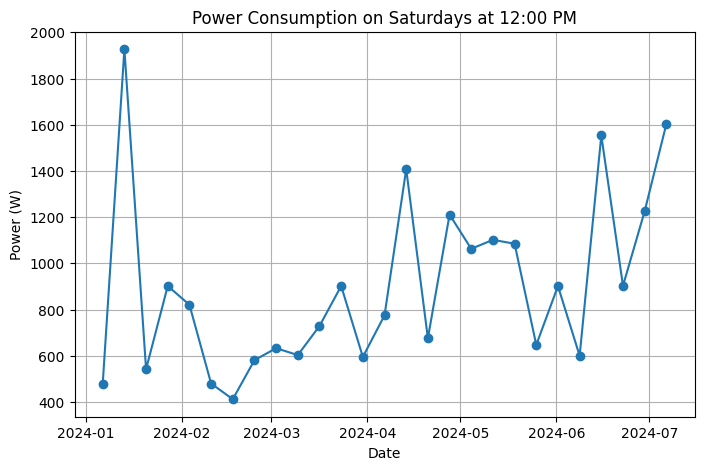

In [321]:
sat_12_rows = data[(data['Time'].dt.hour==12) & (data['Day']=='Saturday')]
plt.figure(figsize=(8, 5))
plt.plot(sat_12_rows['Time'], sat_12_rows['Total (W)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Power (W)')
plt.title('Power Consumption on Saturdays at 12:00 PM')
plt.grid(True)
plt.show()

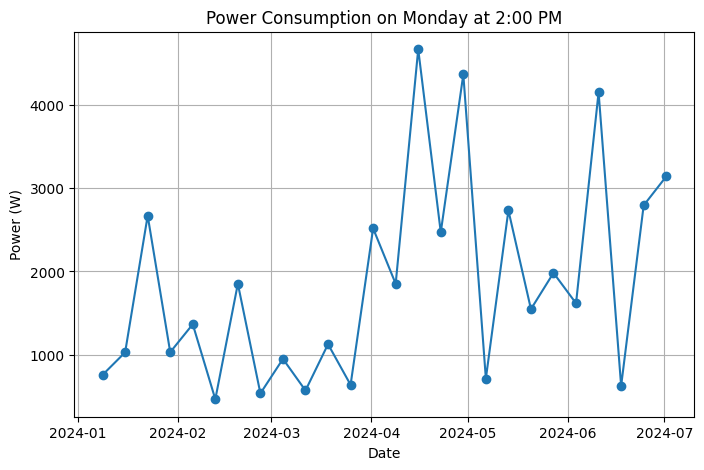

In [322]:
sun_14_rows = data[(data['Time'].dt.hour==14) & (data['Day']=='Monday')]
plt.figure(figsize=(8, 5))
plt.plot(sun_14_rows['Time'], sun_14_rows['Total (W)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Power (W)')
plt.title('Power Consumption on Monday at 2:00 PM')
plt.grid(True)
plt.show()

# Export the Preprocessed Dataset

In [ ]:
data.to_csv('Biotech_preprocessed_dataset.csv', index=False)